# Засоби підготовки та аналізу даних
### ФБ-22 Загородній Ярослав
##### Лабораторна робота №5

#### Згенеруйте двовимірні дані (xx, yy) за допомогою numpy.random : бажано, щоб розподіл точок був навколо деякої наперед заданої прямої (yy = kk + bb) для подальшого аналізу результатів.

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Параметри прямої
k = 2  # нахил
b = 5  # зміщення

# Кількість точок, які ви хочете згенерувати
num_points = 100

# Згенерувати випадкові значення для змінної xx
# Тут ви можете вказати якийсь певний діапазон для xx
# Наприклад, від -10 до 10
x = np.random.uniform(-10, 10, num_points)

# Згенерувати випадкові значення для змінної yy, враховуючи помилку
# yy = kk * xx + bb + помилка
# помилка може бути додана, щоб зробити розподіл точок більш реалістичним
# Тут 1.5 - це стандартне відхилення помилки
error = np.random.normal(0, 1.5, num_points)
y = k * x + b + error

# Тепер у вас є дані xx і yy, які розподілені навколо прямої yy = kk * xx + bb
print(x)
print(y)

[ 3.28286669e+00  1.73352863e-01 -2.29770729e-01 -8.62540010e+00
 -1.72224013e+00 -5.34600673e+00 -5.00073665e+00 -9.98013098e+00
 -4.38369518e+00 -7.80113444e+00  2.36946264e+00  3.70900318e+00
 -2.63012287e+00 -4.32625625e+00 -1.62005863e+00  2.37061411e+00
 -7.83720116e+00 -1.33715814e+00  6.86722234e+00  9.92761670e+00
  7.68259721e+00 -7.00312292e+00  7.61687593e+00 -7.73483685e+00
 -3.75370466e+00  5.84687030e+00 -6.84276294e+00  6.73217584e+00
  1.74904674e+00 -4.22836933e+00  7.99169680e+00 -6.50011151e+00
 -7.23709371e+00 -3.39715732e+00 -3.85919415e+00 -1.19946037e+00
 -4.26057531e+00 -7.55695207e+00 -7.65101738e+00  2.74691017e+00
 -5.71212593e+00  3.97807569e+00 -5.35271899e+00  9.78155483e+00
  2.11990753e+00 -2.15155174e-01 -8.19852094e+00  3.37710373e+00
 -6.29432297e+00  1.83493505e-01  7.97088892e+00  8.80043661e+00
  1.13181672e+00 -3.73323355e+00 -9.94350562e+00  9.54713015e+00
  5.69358206e+00  8.59858158e+00  7.00753631e+00 -9.81841596e-01
  4.82016491e+00 -9.61940

#### Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних оцінок k та b.

In [22]:
def least_squares_fit(x, y):
    """
    Реалізує метод найменших квадратів для пошуку оптимальних оцінок k та b.

    Параметри:
    xx: numpy.ndarray, вектор вхідних змінних
    yy: numpy.ndarray, вектор вихідних змінних

    Повертає:
    k: float, оцінка нахилу
    b: float, оцінка зміщення
    """
    # Матриця з вхідними змінними та зміщенням для обчислення лінійної комбінації
    X = np.column_stack((x, np.ones_like(x)))

    # Обчислення коефіцієнтів лінійної регресії за формулою (X^T * X)^(-1) * X^T * y
    beta = np.linalg.inv(X.T @ X) @ X.T @ y

    # Оцінки нахилу та зміщення
    k, b = beta

    return k, b

estimated_k, estimated_b = least_squares_fit(x, y)

print("Оцінка нахилу (k):", estimated_k)
print("Оцінка зміщення (b):", estimated_b)
print("Оригінальне значення нахилу (k):", k)
print("Оригінальне значення зміщення (b):", b)

Оцінка нахилу (k): 1.955474627374822
Оцінка зміщення (b): 4.968627518359728
Оригінальне значення нахилу (k): 2
Оригінальне значення зміщення (b): 5


#### Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо такі є).

In [23]:
polyfit_params = np.polyfit(x, y, 1)

print("Оцінка нахилу за допомогою np.polyfit():", polyfit_params[0])
print("Оцінка зміщення за допомогою np.polyfit():", polyfit_params[1])

Оцінка нахилу за допомогою np.polyfit(): 1.9554746273748225
Оцінка зміщення за допомогою np.polyfit(): 4.968627518359728


#### Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо такі є).

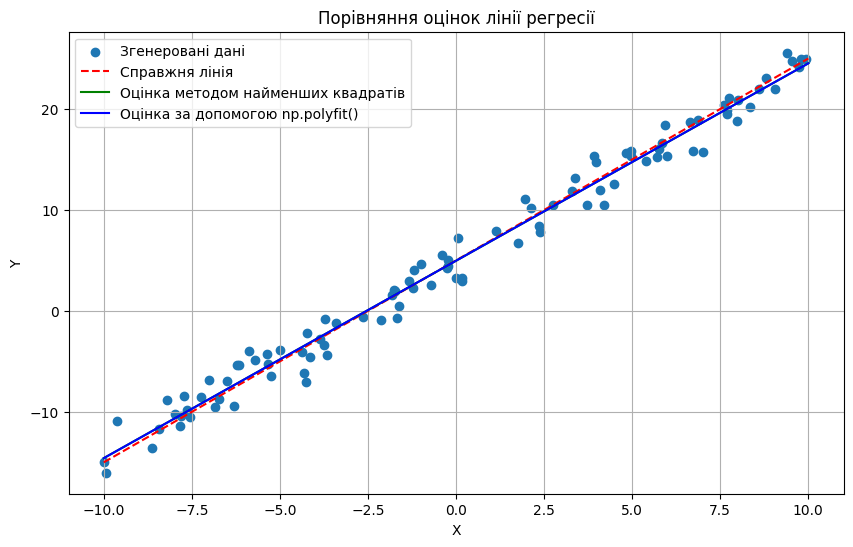

In [24]:
# Генерація точок для відображення згенерованої лінії
line_x = np.linspace(-10, 10, 100)
line_y_true = k * line_x + b
line_y_estimated = estimated_k * line_x + estimated_b
line_y_polyfit = polyfit_params[0] * line_x + polyfit_params[1]

# Відображення результатів на графіку
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Згенеровані дані')
plt.plot(line_x, line_y_true, color='red', linestyle='--', label='Справжня лінія')
plt.plot(line_x, line_y_estimated, color='green', label='Оцінка методом найменших квадратів')
plt.plot(line_x, line_y_polyfit, color='blue', label='Оцінка за допомогою np.polyfit()')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Порівняння оцінок лінії регресії')
plt.legend()
plt.grid(True)
plt.show()

#### Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних оцінок k та b. Визначіть оптимальні вхідні параметри: learning_rate, n_iter

In [26]:
def gradient_descent(x, y, learning_rate=0.01, n_iter=1000):
    # Ініціалізація випадковими значеннями нахилу та зміщення
    k = np.random.randn()
    b = np.random.randn()
    
    # Кількість точок
    m = len(x)
    
    for _ in range(n_iter):
        # Розрахунок градієнтів
        k_gradient = -(2/m) * np.sum(x * (y - (k*x + b)))
        b_gradient = -(2/m) * np.sum(y - (k*x + b))
        
        # Оновлення параметрів за допомогою градієнтного спуску
        k -= learning_rate * k_gradient
        b -= learning_rate * b_gradient
        
    return k, b

learning_rate = 0.01
n_iter = 1000

optimal_k, optimal_b = gradient_descent(x, y, learning_rate, n_iter)
print("Оптимальний нахил (k):", optimal_k)
print("Оптимальне зміщення (b):", optimal_b)

Оптимальний нахил (k): 1.9554746273996417
Оптимальне зміщення (b): 4.968627510886174


#### Додайте отриману лінію регресії на загальний графік

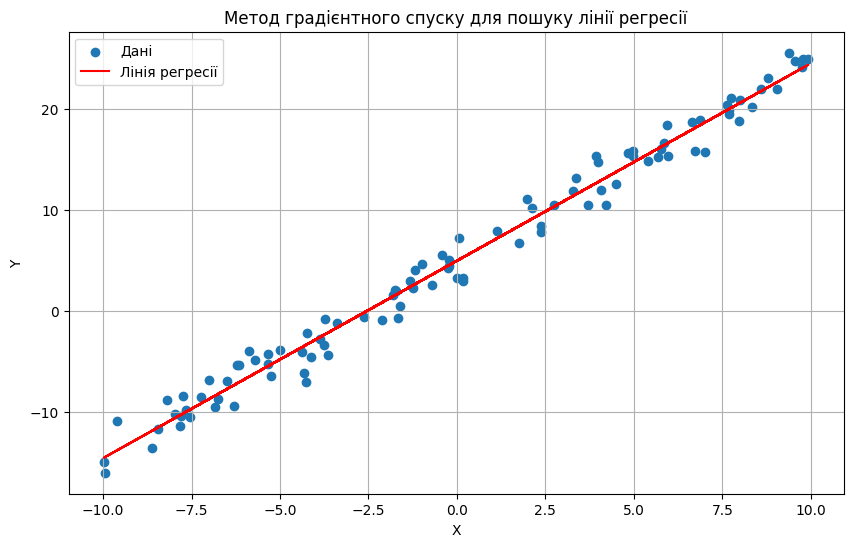

In [28]:
# Отримання лінії регресії
regression_line = optimal_k * x + optimal_b

# Відображення результатів на графіку
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Дані')
plt.plot(x, regression_line, color='red', label='Лінія регресії')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Метод градієнтного спуску для пошуку лінії регресії')
plt.legend()
plt.grid(True)
plt.show()

#### Побудуйте графік похибки від кількості ітерацій, зробіть висновки

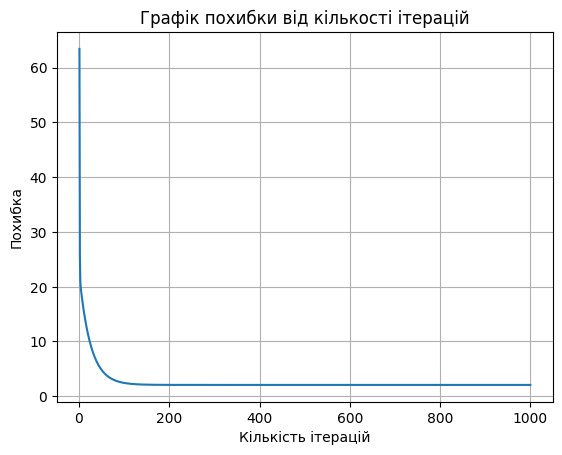

In [31]:
def gradient_descent_loss(x, y, learning_rate=0.01, n_iter=1000):
    # Ініціалізація випадковими значеннями нахилу та зміщення
    k = np.random.randn()
    b = np.random.randn()
    
    # Кількість точок
    m = len(x)
    
    # Зберігання значень функції втрат після кожної ітерації
    loss_history = []
    
    for _ in range(n_iter):
        # Розрахунок градієнтів
        k_gradient = -(2/m) * np.sum(x * (y - (k*x + b)))
        b_gradient = -(2/m) * np.sum(y - (k*x + b))
        
        # Оновлення параметрів за допомогою градієнтного спуску
        k -= learning_rate * k_gradient
        b -= learning_rate * b_gradient
        
        # Розрахунок функції втрат
        loss = np.mean((y - (k*x + b))**2)
        loss_history.append(loss)
        
    return k, b, loss_history

optimal_k, optimal_b, loss_history = gradient_descent_loss(x, y, learning_rate, n_iter)

# Побудова графіка похибки від кількості ітерацій
plt.plot(np.arange(1, n_iter + 1), loss_history)
plt.xlabel('Кількість ітерацій')
plt.ylabel('Похибка')
plt.title('Графік похибки від кількості ітерацій')
plt.grid(True)
plt.show()

#### Порівняйте отримані результати з результатами попереднього завдання

In [32]:
estimated_k_polyfit = polyfit_params[0]
estimated_b_polyfit = polyfit_params[1]

# Виведення результатів
print("Оптимальний нахил (градієнтний спуск):", optimal_k)
print("Оптимальне зміщення (градієнтний спуск):", optimal_b)
print("Оцінка нахилу (метод найменших квадратів):", estimated_k)
print("Оцінка зміщення (метод найменших квадратів):", estimated_b)
print("Оцінка нахилу (np.polyfit()):", estimated_k_polyfit)
print("Оцінка зміщення (np.polyfit()):", estimated_b_polyfit)

Оптимальний нахил (градієнтний спуск): 1.9554746274004453
Оптимальне зміщення (градієнтний спуск): 4.968627510644202
Оцінка нахилу (метод найменших квадратів): 1.955474627374822
Оцінка зміщення (метод найменших квадратів): 4.968627518359728
Оцінка нахилу (np.polyfit()): 1.9554746273748225
Оцінка зміщення (np.polyfit()): 4.968627518359728
